In [1]:
# predict resuarant food cost

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width',1000)

In [134]:
train=pd.read_excel('Data_Train.xlsx')
test=pd.read_excel('Data_Test.xlsx')

In [282]:
train_2=pd.read_excel('Data_Train.xlsx')
test_2=pd.read_excel('Data_Test.xlsx')

In [4]:
train.shape, test.shape

((12690, 9), (4231, 8))

In [5]:
train.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

In [6]:
test.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

In [7]:
train.dtypes

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
COST              int64
dtype: object

In [8]:
train['TITLE'].nunique()

113

In [9]:
train['RESTAURANT_ID'].nunique()

11892

In [10]:
train['CUISINES'].nunique()

4155

In [11]:
train['TIME'].nunique()

2689

In [12]:
train['RATING'].nunique()

32

In [13]:
train['CITY'].nunique()

359

In [14]:
train['LOCALITY'].nunique()

1416

In [15]:
train['VOTES'].nunique()

1847

In [16]:
train.head(10)

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
5,CASUAL DINING,5618,"North Indian, Chinese, Seafood, Biryani",12noon – 12:30AM (Mon-Sun),Mumbai,Vile Parle West,4.0,550 votes,800
6,CAFÉ,4383,"Cafe, Chinese, Pizza, North Indian, Burger","12noon – 11:30pm (Mon, Tue, Thu, Fri, Sat, Sun...",Bangalore,Koramangala 6th Block,4.1,509 votes,600
7,MICROBREWERY,1249,Bar Food,1pm – 1am (Mon-Sun),Gurgaon,Sector 29,4.3,1612 votes,1600
8,QUICK BITES,7062,"South Indian, North Indian",7am – 10:30pm (Mon-Sun),Bangalore,Bannerghatta Road,3.9,101 votes,300
9,QUICK BITES,10109,North Indian,"11am – 2pm, 4pm – 10:30pm (Mon-Sun)",Hyderabad,Dilsukhnagar,3.3,219 votes,200


In [135]:
# lets seperate the titles
num_title_train = train.TITLE.apply(lambda x: len(x.split(',')))
num_title_train.max(),num_title_train.min()

(2, 1)

In [136]:
num_title_test = test.TITLE.apply(lambda x: len(x.split(',')))
num_title_test.max(),num_title_test.min()

(2, 1)

In [57]:
# a few rows have 2 titles

In [137]:
train.TITLE[train.TITLE.apply(lambda y : len(y.split(','))).idxmax()].split(',')

['CASUAL DINING', 'BAR']

In [45]:
# lets drop space inside of ' '
# lets drop the trailing space of 2nd token

In [138]:
train['TITLE'].str.split(',').str[1]

0        NaN
1        BAR
2        NaN
3        NaN
4        NaN
        ... 
12685    NaN
12686    BAR
12687    NaN
12688    NaN
12689    NaN
Name: TITLE, Length: 12690, dtype: object

In [139]:
train['TITLE_1']=train['TITLE'].str.split(',').str[0]

In [140]:
train['TITLE_2']=train['TITLE'].str.split(',').str[1]

In [141]:
train['TITLE_2'].value_counts()

BAR               428
QUICK BITES       261
CASUAL DINING     257
DESSERT PARLOR    138
CAFÉ               94
BAKERY             69
SWEET SHOP         53
LOUNGE             47
PUB                35
BEVERAGE SHOP      34
MICROBREWERY       27
FOOD COURT         15
FINE DINING         8
CLUB                5
KIOSK               4
IRANI CAFE          3
CONFECTIONERY       2
FOOD TRUCK          1
PAAN SHOP           1
Name: TITLE_2, dtype: int64

In [142]:
train['TITLE_2'][1]

'BAR'

In [143]:
test['TITLE_1']=test['TITLE'].str.split(',').str[0]
test['TITLE_2']=test['TITLE'].str.split(',').str[1]

In [144]:
# we'll drop title now from both

In [145]:
train['RESTAURANT_ID'].value_counts().head(590)

7264     8
4634     7
9910     6
13173    5
1571     5
12747    5
8171     5
3378     5
13150    5
2231     5
1521     5
11971    5
7745     5
8032     5
10614    5
12891    5
4058     5
661      4
7173     4
13078    4
12129    4
10648    4
13513    4
5804     4
5227     4
8351     4
201      4
6935     4
12645    4
10357    4
13999    4
6466     4
7421     4
8605     4
1619     4
12332    4
6476     4
3469     4
5898     4
8499     4
5046     4
11182    4
13113    4
3111     4
13672    4
4452     4
10259    4
5674     4
12806    4
13048    4
2229     3
9317     3
7932     3
7241     3
3861     3
14711    3
5627     3
796      3
14463    3
741      3
2795     3
11086    3
3057     3
11746    3
4595     3
13331    3
14502    3
14517    3
302      3
5599     3
5183     3
1842     3
740      3
4453     3
9331     3
13358    3
13828    3
15067    3
8978     3
15108    3
4510     3
7292     3
3124     3
6222     3
5941     3
1847     3
13065    3
10391    3
12557    3
944      3
11915    3

In [66]:
# 589 restauants ids are being repeated
# maybe they are branches of same restaurant

In [146]:
# lets seperate the cuisines
num_cus_train = train.CUISINES.apply(lambda x: len(x.split(',')))
num_cus_train.max(),num_cus_train.min()

(8, 1)

In [147]:
num_cus_test = test.CUISINES.apply(lambda x: len(x.split(',')))
num_cus_test.max(),num_cus_test.min()

(8, 1)

In [148]:
# lets seperate the cuisines

In [149]:
train.CUISINES[train.CUISINES.apply(lambda y : len(y.split(','))).idxmax()].split(',')

['Continental',
 ' American',
 ' Asian',
 ' North Indian',
 ' Chinese',
 ' Pizza',
 ' Biryani',
 '']

In [150]:
train['CUISINES'].str.split(',')

0                          [Malwani,  Goan,  North Indian]
1                       [Asian,  Modern Indian,  Japanese]
2          [North Indian,  Chinese,  Biryani,  Hyderabadi]
3                                      [Tibetan,  Chinese]
4                                               [Desserts]
                               ...                        
12685                      [North Indian,  Burger,  Kebab]
12686                                 [Goan,  Continental]
12687        [Finger Food,  Continental,  Asian,  Chinese]
12688    [North Indian,  South Indian,  Chinese,  Stree...
12689                             [North Indian,  Chinese]
Name: CUISINES, Length: 12690, dtype: object

In [151]:
def seperate_cus(df, column, col_number):
    return df[column].str.split(',').str[col_number]

In [152]:
for i in range(0,8):
    cus = "Cuisine_"+ str(i+1)
    train[cus] = seperate_cus(train,'CUISINES', i)

In [153]:
for i in range(0,8):
    cus = "Cuisine_"+ str(i+1)
    test[cus] = seperate_cus(test,'CUISINES', i)

In [79]:
# test.head(1)

In [80]:
# we'll drop cuisines from both

In [154]:
train['TIME'].str.replace(')','')

0                  11am – 4pm, 7:30pm – 11:30pm (Mon-Sun
1                                    6pm – 11pm (Mon-Sun
2                     11am – 3:30pm, 7pm – 11pm (Mon-Sun
3                                 11:30am – 1am (Mon-Sun
4                                    11am – 1am (Mon-Sun
                              ...                       
12685    12noon – 12midnight (Mon, Tue, Wed, Thu, Sun...
12686     12noon – 1am (Mon-Fri,11am – 5pm, 7pm – 1am...
12687                          12noon – 12:30AM (Mon-Sun
12688                             6am – 10:45pm (Mon-Sun
12689                            12:30pm – 11pm (Mon-Sun
Name: TIME, Length: 12690, dtype: object

In [155]:
train['days']=train['TIME'].str.replace(')','').str.split('(').str[1]

In [156]:
train['days']=train['days'].str.replace('-',',')

In [106]:
# we can extract the number of days a rest in open

In [111]:
# train['num_days']=0
# day_dict={'Mon':0,'Tue':1,'Wed':2,'Thu':3,'Fri':4,'Sat':5,'Sun':6}
# # count_dict={'Mon':1,'Tue':1,'Wed':1,'Thu':1,'Fri':1,'Sat':1,'Sun':1}
# day_list=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
# for i in range(len(train)):
#     len_days=0
#     token=train['days'][i].split(',')
#     for j in token:
#         if j in day_list:
#             len_days+=1
#     if len_days==2:
#         train['num_days'].iloc[i]=day_dict[token[1]]-day_dict[token[0]]+1
#     else:
#         train['num_days'].iloc[i]=len_days

In [157]:
train['days'][1370].split(',')

['Mon', '11am – 11pm ']

In [158]:
train['days'].value_counts()

Mon,Sun                                        10825
Mon,Sat,Closed                                    95
Mon, Wed, Thu, Fri, Sat, Sun...                   68
Mon, Tue, Wed, Thu, Sun...                        37
Mon, Wed, Thu, Fri, Sat, Sun, Closed...           33
Mon, Tue, Wed, Thu, Sun, 12noon...                32
Mon,11am – 11pm                                   25
Mon, Wed, Thu, Fri...                             22
Mon, Tue, Wed, Thu, Sat, Sun...                   20
Mon,Thu,12noon –...                               17
Mon, Tue, Wed...                                  16
Mon, Tue, Wed, Thu, Sun, 11am –...                16
Mon,Fri,12noon –...                               14
Mon,12noon – 11pm                                 14
Mon, Wed, Thu...                                  14
Mon, Tue...                                       12
Mon,Thu,12noon...                                 12
Mon,Fri,12noon...                                 12
Mon, Tue, Wed, Fri, Sat, Sun...               

In [112]:
# most of the shops are open mon to sun, so it does not give us any significant info

In [113]:
# we'll drop time

In [115]:
# in rating, there are missing values
# first convert them to '1000'
# then convert the dtype and then impute missing values with median

In [159]:
train['RATING']=train['RATING'].replace(np.NaN,'1000').str.replace('NEW','0').str.replace('-','1000')
train['RATING']=train['RATING'].astype(np.float64)
train['RATING'].median()

3.8

In [160]:
train['RATING']=train['RATING'].replace(1000.0,3.8)

In [126]:
# binning required,
# make a class of 2.5 and below together

In [161]:
test['RATING']=test['RATING'].replace(np.NaN,'1000').str.replace('NEW','0').str.replace('-','1000')
test['RATING']=test['RATING'].astype(np.float64)
test['RATING']=test['RATING'].replace(1000.0,3.8)

In [162]:
# lets apply binning
for i in range(len(train)):
    if train['RATING'].iloc[i]<=2.5:
        train['RATING'].iloc[i]=2.0

In [130]:
# train['RATING'].value_counts()

In [163]:
for i in range(len(test)):
    if test['RATING'].iloc[i]<=2.5:
        test['RATING'].iloc[i]=2.0

In [170]:
train['VOTES']=train['VOTES'].str.split(' ').str[0]
train['VOTES']=train['VOTES'].astype(np.float64)

In [166]:
test['VOTES']=test['VOTES'].str.split(' ').str[0]

In [168]:
test['VOTES']=test['VOTES'].astype(np.float64)

In [172]:
# train['VOTES'].value_counts()

In [173]:
train.dtypes

TITLE             object
RESTAURANT_ID      int64
CUISINES          object
TIME              object
CITY              object
LOCALITY          object
RATING           float64
VOTES            float64
COST               int64
TITLE_1           object
TITLE_2           object
Cuisine_1         object
Cuisine_2         object
Cuisine_3         object
Cuisine_4         object
Cuisine_5         object
Cuisine_6         object
Cuisine_7         object
Cuisine_8         object
days              object
dtype: object

In [174]:
test.dtypes

TITLE             object
RESTAURANT_ID      int64
CUISINES          object
TIME              object
CITY              object
LOCALITY          object
RATING           float64
VOTES            float64
TITLE_1           object
TITLE_2           object
Cuisine_1         object
Cuisine_2         object
Cuisine_3         object
Cuisine_4         object
Cuisine_5         object
Cuisine_6         object
Cuisine_7         object
Cuisine_8         object
dtype: object

In [175]:
train.drop(['TITLE','CUISINES','TIME','days'],axis=1,inplace=True)

In [176]:
test.drop(['TITLE','CUISINES','TIME'],axis=1,inplace=True)

In [177]:
train.dtypes

RESTAURANT_ID      int64
CITY              object
LOCALITY          object
RATING           float64
VOTES            float64
COST               int64
TITLE_1           object
TITLE_2           object
Cuisine_1         object
Cuisine_2         object
Cuisine_3         object
Cuisine_4         object
Cuisine_5         object
Cuisine_6         object
Cuisine_7         object
Cuisine_8         object
dtype: object

In [178]:
# all dtypes ok

In [179]:
# lets create a new column num_branch denoting the number of branches of a rest

In [186]:
train['num_branch']=1
for i in range(len(train)):
    id=train['RESTAURANT_ID'].iloc[i]
    count=train['RESTAURANT_ID'].value_counts()[id]
    train['num_branch'].iloc[i]=count

In [187]:
train['num_branch'].value_counts()

1    11303
2      906
3      258
4      132
5       70
8        8
7        7
6        6
Name: num_branch, dtype: int64

In [188]:
test['num_branch']=1
for i in range(len(test)):
    id=test['RESTAURANT_ID'].iloc[i]
    count=test['RESTAURANT_ID'].value_counts()[id]
    test['num_branch'].iloc[i]=count

In [189]:
# engineered all the features as much as possible

In [190]:
# now lets treat missing values

In [195]:
# train.dtypes

In [197]:
# test.dtypes

In [191]:
train.columns

Index(['RESTAURANT_ID', 'CITY', 'LOCALITY', 'RATING', 'VOTES', 'COST', 'TITLE_1', 'TITLE_2', 'Cuisine_1', 'Cuisine_2', 'Cuisine_3', 'Cuisine_4', 'Cuisine_5', 'Cuisine_6', 'Cuisine_7', 'Cuisine_8', 'num_branch'], dtype='object')

In [192]:
test.columns

Index(['RESTAURANT_ID', 'CITY', 'LOCALITY', 'RATING', 'VOTES', 'TITLE_1', 'TITLE_2', 'Cuisine_1', 'Cuisine_2', 'Cuisine_3', 'Cuisine_4', 'Cuisine_5', 'Cuisine_6', 'Cuisine_7', 'Cuisine_8', 'num_branch'], dtype='object')

In [198]:
train.isnull().sum()

RESTAURANT_ID        0
CITY               112
LOCALITY            98
RATING               0
VOTES             1204
COST                 0
TITLE_1              0
TITLE_2          11208
Cuisine_1            0
Cuisine_2         3062
Cuisine_3         6999
Cuisine_4         9995
Cuisine_5        11675
Cuisine_6        12276
Cuisine_7        12514
Cuisine_8        12613
num_branch           0
dtype: int64

In [204]:
train['CITY']=train['CITY'].replace(np.NaN,'Other')

In [206]:
# train['CITY'].value_counts(dropna=False)

In [207]:
# lets apply binning

In [208]:
for i in range(len(train)):
    id=train['CITY'].iloc[i]
    count=train['CITY'].value_counts()[id]
    if count < 50:
        train['CITY'].iloc[i]='Other'

In [209]:
train['CITY'].value_counts()

Chennai         2174
Bangalore       2149
Hyderabad       1819
Mumbai          1722
New Delhi       1321
Kochi           1279
Other            762
Gurgaon          379
Secunderabad     310
Noida            211
Navi Mumbai      165
Ghaziabad        102
Thane             97
Faridabad         79
Bandra West       69
Thane West        52
Name: CITY, dtype: int64

In [210]:
test['CITY']=test['CITY'].replace(np.NaN,'Other')
for i in range(len(test)):
    id=test['CITY'].iloc[i]
    count=test['CITY'].value_counts()[id]
    if count < 50:
        test['CITY'].iloc[i]='Other'

In [213]:
train['LOCALITY'].value_counts(dropna=False).head(500)

Gachibowli                      166
Indiranagar                     138
Edappally                       122
Kakkanad                        121
HSR                             120
Madhapur                        117
Kukatpally                      117
Marathahalli                    116
Banjara Hills                   113
Jubilee Hills                   113
Whitefield                      111
Fort Kochi                      103
BTM                              99
NaN                              98
Jayanagar                        96
Nungambakkam                     93
MG Road                          92
T. Nagar                         92
Kaloor                           91
Andheri West                     89
Kondapur                         87
JP Nagar                         84
Borivali West                    79
Anna Nagar East                  79
Koramangala 5th Block            77
Connaught Place                  76
Electronic City                  75
Thane West                  

In [214]:
# we'll not apply binning

In [215]:
train['LOCALITY']=train['LOCALITY'].replace(np.NaN,'Other')
test['LOCALITY']=test['LOCALITY'].replace(np.NaN,'Other')

In [217]:
train['VOTES'].value_counts(dropna=False)

NaN       1204
44.0        71
29.0        66
28.0        66
38.0        65
          ... 
865.0        1
4980.0       1
1131.0       1
3369.0       1
2055.0       1
Name: VOTES, Length: 1848, dtype: int64

In [218]:
train['VOTES']=train['VOTES'].replace(np.NaN,-1.0)
test['VOTES']=test['VOTES'].replace(np.NaN,-1.0)

In [219]:
train.isnull().sum()

RESTAURANT_ID        0
CITY                 0
LOCALITY             0
RATING               0
VOTES                0
COST                 0
TITLE_1              0
TITLE_2          11208
Cuisine_1            0
Cuisine_2         3062
Cuisine_3         6999
Cuisine_4         9995
Cuisine_5        11675
Cuisine_6        12276
Cuisine_7        12514
Cuisine_8        12613
num_branch           0
dtype: int64

In [220]:
test.isnull().sum()

RESTAURANT_ID       0
CITY                0
LOCALITY            0
RATING              0
VOTES               0
TITLE_1             0
TITLE_2          3769
Cuisine_1           0
Cuisine_2         985
Cuisine_3        2331
Cuisine_4        3314
Cuisine_5        3875
Cuisine_6        4094
Cuisine_7        4157
Cuisine_8        4200
num_branch          0
dtype: int64

In [221]:
# lets impute na with 'null' now, as all the mising values are object type

In [223]:
train.fillna('null',inplace=True)
test.fillna('null',inplace=True)

In [224]:
# engineered all the missing values

# EDA

In [225]:
train.columns

Index(['RESTAURANT_ID', 'CITY', 'LOCALITY', 'RATING', 'VOTES', 'COST', 'TITLE_1', 'TITLE_2', 'Cuisine_1', 'Cuisine_2', 'Cuisine_3', 'Cuisine_4', 'Cuisine_5', 'Cuisine_6', 'Cuisine_7', 'Cuisine_8', 'num_branch'], dtype='object')

In [226]:
train['CITY'].value_counts()

Chennai         2174
Bangalore       2149
Hyderabad       1819
Mumbai          1722
New Delhi       1321
Kochi           1279
Other            762
Gurgaon          379
Secunderabad     310
Noida            211
Navi Mumbai      165
Ghaziabad        102
Thane             97
Faridabad         79
Bandra West       69
Thane West        52
Name: CITY, dtype: int64

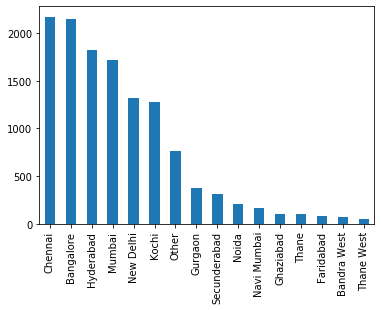

In [227]:
train['CITY'].value_counts().plot.bar()

In [228]:
train['RATING'].value_counts()

3.8    1687
3.9    1238
4.0    1099
3.7    1086
3.6     951
4.1     936
2.0     774
3.5     771
4.2     723
3.4     575
4.3     556
3.3     365
4.4     362
3.2     266
4.5     199
2.9     186
3.1     186
3.0     170
2.8     146
4.6     141
2.7      89
4.7      69
2.6      61
4.8      32
4.9      22
Name: RATING, dtype: int64

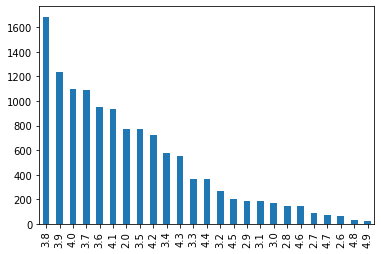

In [229]:
train['RATING'].value_counts().plot.bar()

In [230]:
train['VOTES'].value_counts()

-1.0       1204
 44.0        71
 29.0        66
 28.0        66
 38.0        65
           ... 
 865.0        1
 4980.0       1
 1131.0       1
 3369.0       1
 2055.0       1
Name: VOTES, Length: 1848, dtype: int64

In [231]:
train['TITLE_1'].value_counts()

QUICK BITES       4337
CASUAL DINING     4122
None              1003
CAFÉ               749
DESSERT PARLOR     478
BAKERY             463
FINE DINING        350
BAR                254
BEVERAGE SHOP      215
LOUNGE             154
PUB                103
SWEET SHOP         102
FOOD COURT          93
KIOSK               56
MESS                53
DHABA               45
MICROBREWERY        44
FOOD TRUCK          30
CLUB                23
COCKTAIL BAR         6
PAAN SHOP            4
CONFECTIONERY        3
MEAT SHOP            3
Name: TITLE_1, dtype: int64

In [233]:
# binning required

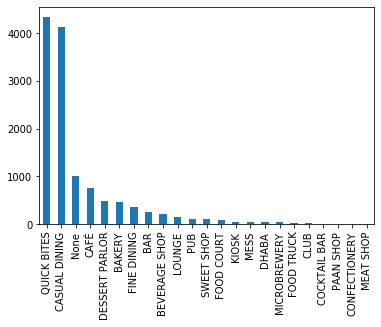

In [232]:
train['TITLE_1'].value_counts().plot.bar()

In [234]:
train['TITLE_2'].value_counts()

null              11208
BAR                 428
QUICK BITES         261
CASUAL DINING       257
DESSERT PARLOR      138
CAFÉ                 94
BAKERY               69
SWEET SHOP           53
LOUNGE               47
PUB                  35
BEVERAGE SHOP        34
MICROBREWERY         27
FOOD COURT           15
FINE DINING           8
CLUB                  5
KIOSK                 4
IRANI CAFE            3
CONFECTIONERY         2
FOOD TRUCK            1
PAAN SHOP             1
Name: TITLE_2, dtype: int64

In [235]:
# binning can be applied

In [236]:
train['Cuisine_1'].value_counts()

North Indian        3129
South Indian        1241
Chinese              996
Fast Food            762
Cafe                 713
Biryani              522
Bakery               514
Continental          514
Kerala               358
Desserts             333
Street Food          294
Italian              251
Beverages            200
Pizza                199
Arabian              199
Ice Cream            168
Finger Food          167
Andhra               150
Asian                137
Mughlai              128
Seafood              126
Mithai               111
American             110
Healthy Food          95
Burger                93
European              85
Juices                72
Lebanese              57
Chettinad             56
Mexican               55
Thai                  53
Japanese              52
Rolls                 51
Bengali               51
BBQ                   47
Hyderabadi            45
Maharashtrian         38
Sandwich              36
Modern Indian         35
Mediterranean         35


In [237]:
# binning can be applied

In [238]:
train['Cuisine_2'].value_counts()

null                 3062
 Chinese             1830
 North Indian        1373
 Fast Food            782
 South Indian         638
 Continental          497
 Desserts             484
 Italian              380
 Mughlai              377
 Biryani              322
 Beverages            292
 Street Food          192
 Seafood              147
 Ice Cream            126
 Asian                122
 Pizza                118
 Thai                 115
 Burger               110
 Momos                 95
 American              92
 Bakery                88
 Kerala                87
 Arabian               85
 Mexican               79
 Sandwich              77
 European              67
 Rolls                 65
 Andhra                60
 Healthy Food          60
 Juices                57
 Cafe                  57
 Kebab                 56
 Mediterranean         53
 Hyderabadi            44
 Salad                 41
 Mithai                39
 Lebanese              37
 Chettinad             36
 Finger Food

In [239]:
train['Cuisine_3'].value_counts()

null                  6999
 Chinese              1146
 North Indian          593
 Fast Food             387
 Continental           345
 Italian               276
 Biryani               274
 South Indian          252
 Beverages             200
 Mughlai               181
 Seafood               146
 Desserts              138
 Momos                 111
 Asian                  97
 Street Food            93
 Thai                   79
 Pizza                  78
 Burger                 76
 Rolls                  74
 Kebab                  72
 Arabian                65
 European               65
 Sandwich               65
 Salad                  64
 American               61
 Mexican                55
 Juices                 45
 Kerala                 40
 Ice Cream              35
 BBQ                    35
 Japanese               33
 Cafe                   32
 Lebanese               32
 Healthy Food           31
 Bakery                 28
 Finger Food            28
 Chettinad              28
 

In [240]:
train['num_branch'].value_counts()

1    11303
2      906
3      258
4      132
5       70
8        8
7        7
6        6
Name: num_branch, dtype: int64

In [241]:
train.describe()

,RESTAURANT_ID,RATING,VOTES,COST,num_branch
count,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000
mean,7759.134121,3.684405,376.136249,655.252246,1.175414
std,4504.874150,0.579108,810.991015,627.003540,0.605328
min,0.000000,2.000000,-1.000000,20.000000,1.000000
25%,3863.250000,3.500000,39.250000,300.000000,1.000000
50%,7740.000000,3.800000,132.000000,500.000000,1.000000
75%,11688.750000,4.000000,405.000000,800.000000,1.000000
max,15573.000000,4.900000,41186.000000,14000.000000,8.000000


# Bivariate

In [242]:
train.columns

Index(['RESTAURANT_ID', 'CITY', 'LOCALITY', 'RATING', 'VOTES', 'COST', 'TITLE_1', 'TITLE_2', 'Cuisine_1', 'Cuisine_2', 'Cuisine_3', 'Cuisine_4', 'Cuisine_5', 'Cuisine_6', 'Cuisine_7', 'Cuisine_8', 'num_branch'], dtype='object')

In [244]:
train.groupby('CITY').mean()[['COST']]

,COST
CITY,
Bandra West,1275.362319
Bangalore,668.733830
Chennai,588.587856
Faridabad,469.240506
Ghaziabad,523.529412
Gurgaon,845.910290
Hyderabad,595.178670
Kochi,433.244722
Mumbai,865.272938


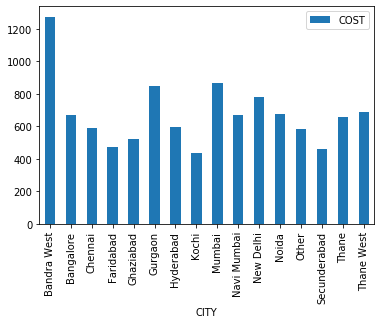

In [245]:
train.groupby('CITY').mean()[['COST']].plot.bar()

In [246]:
train.groupby('num_branch').mean()[['COST']]

,COST
num_branch,
1,659.805538
2,631.511038
3,600.465116
4,626.136364
5,540.000000
6,800.000000
7,264.285714
8,400.000000


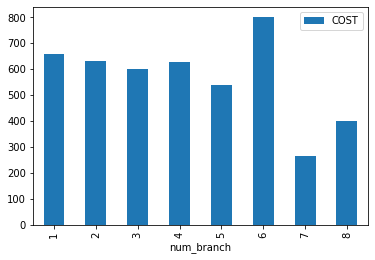

In [247]:
train.groupby('num_branch').mean()[['COST']].plot.bar()

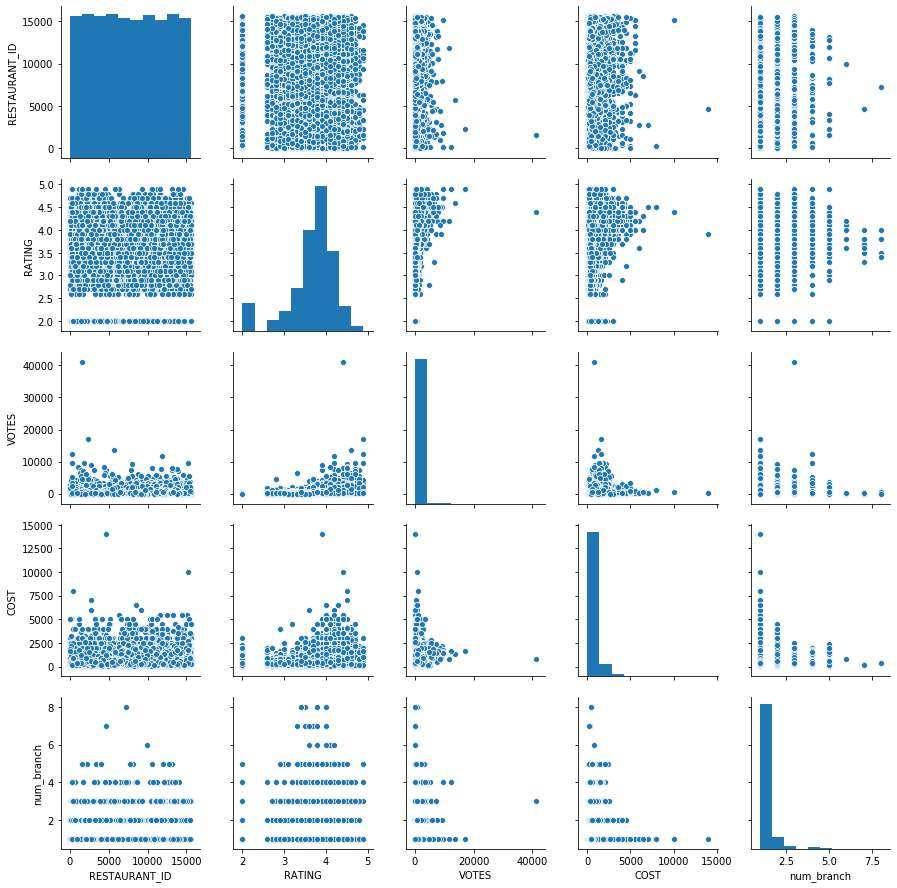

In [249]:
sns.pairplot(train)

In [251]:
# plt.figure(figsize=(12,6))
# sns.heatmap(train.corr(),annot=True,cmap='coolwarm',linewidths=0.8)

# Encoding

In [252]:
from sklearn.preprocessing import LabelEncoder
def le(df,col):
    lab=LabelEncoder()
    df[col]=pd.Series(lab.fit_transform(df[col]))

In [254]:
train.head()

,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,COST,TITLE_1,TITLE_2,Cuisine_1,Cuisine_2,Cuisine_3,Cuisine_4,Cuisine_5,Cuisine_6,Cuisine_7,Cuisine_8,num_branch
0,9438,Thane,Dombivali East,3.6,49.0,1200,CASUAL DINING,null,Malwani,Goan,North Indian,null,null,null,null,null,1
1,13198,Chennai,Ramapuram,4.2,30.0,1500,CASUAL DINING,BAR,Asian,Modern Indian,Japanese,null,null,null,null,null,1
2,10915,Chennai,Saligramam,3.8,221.0,800,CASUAL DINING,null,North Indian,Chinese,Biryani,Hyderabadi,null,null,null,null,1
3,6346,Mumbai,Bandra West,4.1,24.0,800,QUICK BITES,null,Tibetan,Chinese,null,null,null,null,null,null,1
4,15387,Mumbai,Lower Parel,3.8,165.0,300,DESSERT PARLOR,null,Desserts,null,null,null,null,null,null,null,1


In [253]:
train.columns

Index(['RESTAURANT_ID', 'CITY', 'LOCALITY', 'RATING', 'VOTES', 'COST', 'TITLE_1', 'TITLE_2', 'Cuisine_1', 'Cuisine_2', 'Cuisine_3', 'Cuisine_4', 'Cuisine_5', 'Cuisine_6', 'Cuisine_7', 'Cuisine_8', 'num_branch'], dtype='object')

In [255]:
le(train,'CITY')
le(train,'LOCALITY')
le(train,'TITLE_1')
le(train,'TITLE_2')
le(train,'Cuisine_1')
le(train,'Cuisine_2')
le(train,'Cuisine_3')
le(train,'Cuisine_4')
le(train,'Cuisine_5')
le(train,'Cuisine_6')
le(train,'Cuisine_7')
le(train,'Cuisine_8')

In [256]:
le(test,'CITY')
le(test,'LOCALITY')
le(test,'TITLE_1')
le(test,'TITLE_2')
le(test,'Cuisine_1')
le(test,'Cuisine_2')
le(test,'Cuisine_3')
le(test,'Cuisine_4')
le(test,'Cuisine_5')
le(test,'Cuisine_6')
le(test,'Cuisine_7')
le(test,'Cuisine_8')

# Comparing two data sets

In [257]:
train.head(10)

,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,COST,TITLE_1,TITLE_2,Cuisine_1,Cuisine_2,Cuisine_3,Cuisine_4,Cuisine_5,Cuisine_6,Cuisine_7,Cuisine_8,num_branch
0,9438,14,285,3.6,49.0,1200,4,19,59,32,66,85,78,69,47,19,1
1,13198,2,1047,4.2,30.0,1500,4,1,6,60,41,85,78,69,47,19,1
2,10915,2,1102,3.8,221.0,800,4,19,72,23,12,32,78,69,47,19,1
3,6346,8,136,4.1,24.0,800,21,19,100,23,93,85,78,69,47,19,1
4,15387,8,620,3.8,165.0,300,8,19,28,98,93,85,78,69,47,19,1
5,5618,8,1361,4.0,550.0,800,4,19,72,23,78,11,78,69,47,19,2
6,4383,1,575,4.1,509.0,600,3,19,21,23,72,61,13,69,47,19,1
7,1249,5,1154,4.3,1612.0,1600,17,19,11,98,93,85,78,69,47,19,1
8,7062,1,142,3.9,101.0,300,21,19,90,66,93,85,78,69,47,19,1
9,10109,6,282,3.3,219.0,200,21,19,72,98,93,85,78,69,47,19,1


In [258]:
test.head(10)

,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,TITLE_1,TITLE_2,Cuisine_1,Cuisine_2,Cuisine_3,Cuisine_4,Cuisine_5,Cuisine_6,Cuisine_7,Cuisine_8,num_branch
0,4085,8,663,4.3,564.0,5,16,60,19,56,33,57,42,34,7,1
1,12680,5,221,4.2,61.0,22,16,73,24,61,49,57,42,34,7,1
2,1411,5,411,3.8,350.0,5,16,60,69,13,15,57,42,34,7,1
3,204,9,456,3.8,1445.0,19,16,12,81,80,68,57,42,34,7,1
4,13453,4,300,3.6,23.0,22,16,73,42,80,68,57,42,34,7,1
5,4518,3,77,3.7,36.0,13,6,34,22,80,68,57,42,34,7,1
6,1643,6,328,2.0,-1.0,5,16,60,72,26,68,57,42,34,7,1
7,5109,1,471,4.0,703.0,5,16,12,19,80,68,57,42,34,7,1
8,5606,7,252,3.4,475.0,19,16,60,19,61,20,57,42,34,7,1
9,14319,4,562,3.2,6.0,5,16,60,81,80,68,57,42,34,7,1


In [283]:
# lets create one more features num_cuisines
train['num_cus'] = train_2.CUISINES.apply(lambda x: len(x.split(',')))
train['num_title'] = train_2.TITLE.apply(lambda x: len(x.split(',')))
test['num_cus'] = test_2.CUISINES.apply(lambda x: len(x.split(',')))
test['num_title'] = test_2.TITLE.apply(lambda x: len(x.split(',')))

In [286]:
# lets create a copy of both
traincopy=train.copy()
testcopy=test.copy()

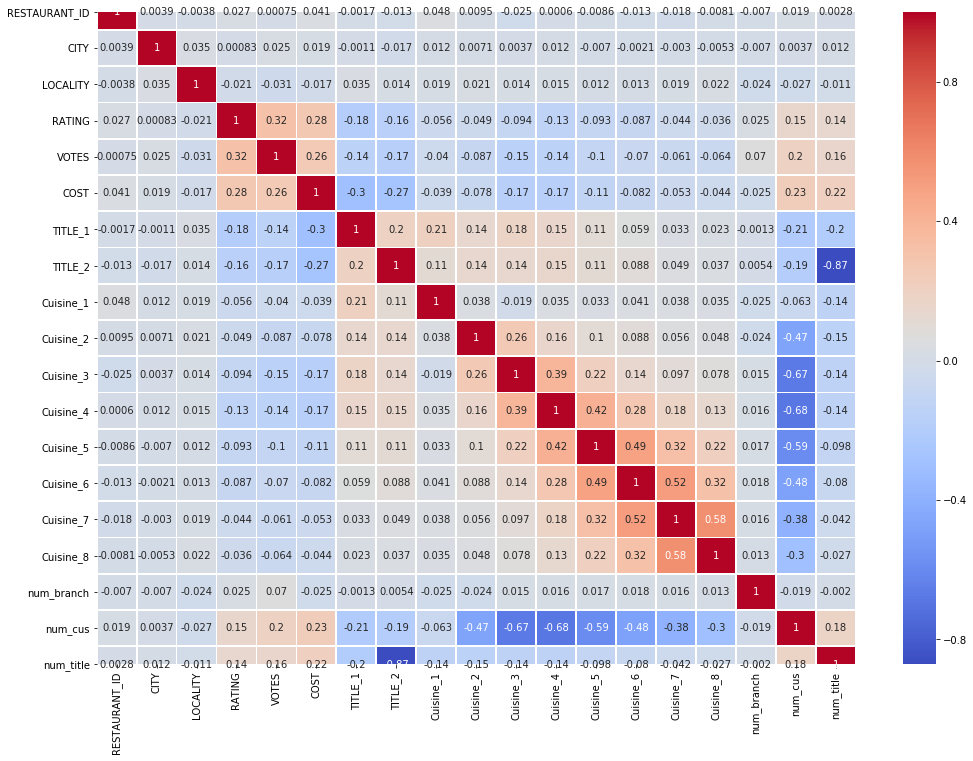

In [287]:
plt.figure(figsize=(17,12))
sns.heatmap(train.corr(),annot=True,cmap='coolwarm',linewidths=0.8)

# Definitions

In [262]:
# this is a regression problem

In [263]:
# lets seperate x and y

In [288]:
x=train.drop('COST',axis=1)
y=train['COST']

In [289]:
xs=std(x)

In [265]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score,cross_val_predict,cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [266]:
lr=LinearRegression(n_jobs=-1)
rid=Ridge(random_state=45)
ls=Lasso(random_state=45)
dt=DecisionTreeRegressor(random_state=45)
svr=SVR()
knn=KNeighborsRegressor(n_jobs=-1)
rf=RandomForestRegressor(n_jobs=-1,random_state=45)
gb=GradientBoostingRegressor(random_state=45)
xgb=XGBRegressor(n_jobs=-1,random_state=45)
ada=AdaBoostRegressor(random_state=45)

In [401]:
# Now, let's define some functions to reuse them
def fit(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs)
    m.fit(x_train,y_train)
    
def get_score(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs)
    m.fit(x_train,y_train)
    train_score=m.score(x_train,y_train)
    pred=m.predict(x_test)
    test_score=m.score(x_test,y_test)
    rmse=np.sqrt(mean_squared_error(pred,y_test))
    return train_score,test_score,rmse

def get_pred(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    return pred

def get_metrics(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    mse=mean_squared_error(pred,y_test)
    mae=mean_absolute_error(pred,y_test)
    rmse=np.sqrt(mean_squared_error(pred,y_test))
    return mse,rmse,mae

from sklearn.model_selection import GridSearchCV
def gridcv(m,p,x,y):
    gkb=GridSearchCV(m,p,n_jobs=-1,cv=4,verbose=5)
    gkb.fit(x,y)
    return gkb.best_params_


from sklearn.model_selection import RandomizedSearchCV
def randomcv(m,p,x,y):
    from sklearn.model_selection import RandomizedSearchCV
    gkb=RandomizedSearchCV(estimator=m,param_distributions=p,
                          cv=4,n_iter=100,
                          n_jobs=-1, verbose=5,return_train_score=True,random_state=45)
    gkb.fit(x,y)
    return gkb.best_params_

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
def bfe(m,x,y,k):
    sf=sfs(m, k_features=k, forward=False, verbose=3, cv=5, n_jobs=-1)
    sf.fit(x,y)
    feat_names=list(sf.k_feature_names_)
    xbfe=x[feat_names]
    return xbfe

def ffs(m,x,y,k):
    sf=sfs(m, k_features=k, forward=True, cv=5, n_jobs=-1)
    sf.fit(x,y)
    feat_names=list(sf.k_feature_names_)
    xffs=x[feat_names]
    return xffs

from sklearn.decomposition import PCA
def nforpca(x):
    pca=PCA().fit(x)
    plt.figure()
    plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
    plt.xlabel('No of Components')
    plt.ylabel('Variance')
    plt.axhline(y=95, color='r', linestyle='--')
    plt.show()
    
def pca(m,x,n):
    pca=PCA(n_components=n)
    xpca=pd.DataFrame(pca.fit_transform(x))
    return xpca


def cross(m,x,y,c=5):
    score=cross_val_score(m,x,y,cv=c,n_jobs=-1)
    return (score.mean(), score.std())

from sklearn.preprocessing import StandardScaler
def std(x):
    scx=StandardScaler()
    xs=pd.DataFrame(scx.fit_transform(x), columns=x.columns)
    return xs

from sklearn.preprocessing import MinMaxScaler
def mmc(x):
    mm=MinMaxScaler()
    xm=pd.DataFrame(mm.fit_transform(x), columns=x.columns)
    return xm

def modified_bfe(m,x,y,k):
    sf=sfs(m, k_features=k,verbose=5, forward=False, cv=5, n_jobs=-1)
    sf.fit(x,y)
    feat_names=list(sf.k_feature_names_)
    xbfe=x[feat_names]
    x_train, x_test, y_train, y_test=train_test_split(xbfe,y,test_size=0.25,random_state=45)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    test_score=m.score(x_test,y_test)
    rmse=np.sqrt(mean_squared_error(pred,y_test))
    return test_score,rmse

def modified_ffs(m,x,y,k):
    sf=sfs(m, k_features=k, forward=True, cv=5, n_jobs=-1)
    sf.fit(x,y)
    feat_names=list(sf.k_feature_names_)
    xffs=x[feat_names]
    x_train, x_test, y_train, y_test=train_test_split(xffs,y,test_size=0.25,random_state=45)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    test_score=r2_score(pred,y_test)
    return test_score

def modified_pca(m,x,y,n):
    pca=PCA(n_components=n)
    xpca=pd.DataFrame(pca.fit_transform(x))
    x_train, x_test, y_train, y_test=train_test_split(xpca,y,test_size=0.25,random_state=45)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    test_score=m.score(x_test,y_test)
    rmse=np.sqrt(mean_squared_error(pred,y_test))
    return test_score,rmse

def tts(x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs)
    return x_train, x_test, y_train, y_test

# Iteration A

In [399]:
print("LR ", get_score(lr,x,y))
print("RID ", get_score(rid,x,y))
print("LS ", get_score(ls,x,y))
print("DT ", get_score(dt,x,y))
print("SVR ", get_score(svr,x,y))
print("KNN ", get_score(knn,x,y))
print("RF ", get_score(rf,x,y))
print("GB ", get_score(gb,x,y))
print("XGB ", get_score(xgb,x,y))

LR  (0.21063285618062288, 0.22030161190657738, 542.1369263085596)
RID  (0.21063281208983753, 0.2203006680868913, 542.1372544350228)
LS  (0.21048367106270816, 0.22005716960203725, 542.2219019970142)
DT  (1.0, 0.4870266821330643, 439.73705040070826)
SVR  (-0.059998444020413766, -0.06302420281272014, 633.0197313684893)
KNN  (0.3254923082353818, -0.02394725138534115, 621.2758371938103)
RF  (0.9384387505201166, 0.6622680023459697, 356.8056932234573)
GB  (0.7240739859210574, 0.6785447826057592, 348.1015126473802)
XGB  (0.9378135317672289, 0.6902783654046492, 341.68934974335065)


# Iteration B

In [400]:
print("LR ", get_score(lr,xs,y))
print("RID ", get_score(rid,xs,y))
print("LS ", get_score(ls,xs,y))
print("DT ", get_score(dt,xs,y))
print("SVR ", get_score(svr,xs,y))
print("KNN ", get_score(knn,xs,y))
print("RF ", get_score(rf,xs,y))
print("GB ", get_score(gb,xs,y))
print("XGB ", get_score(xgb,xs,y))

LR  (0.21063285618062275, 0.22030161190657727, 542.1369263085597)
RID  (0.21063284348096956, 0.22030170302147123, 542.1368946317275)
LS  (0.21044420322125904, 0.2201818967190201, 542.1785446662007)
DT  (1.0, 0.4867570520752077, 439.8526029509465)
SVR  (0.05782920220180188, 0.06760306097790425, 592.8517286562264)
KNN  (0.5411626653444872, 0.30031752331814554, 513.5658883008306)
RF  (0.9384478282247585, 0.6625808919339151, 356.6403747811605)
GB  (0.7240739859210574, 0.6806980323013204, 346.9336845007251)
XGB  (0.9378135317672289, 0.6901075396624504, 341.78356545857196)


In [272]:
# lets build a DT, RF, GB and XGB with x

# cross validate

In [292]:
for i in range(2,25):
    print(i," ",cross(dt,x,y,i))

2   (0.376717771402978, 0.14834925369155905)
3   (0.4008456088282049, 0.11120216585896235)
4   (0.3878867552064398, 0.1284234066224939)
5   (0.3992156634720588, 0.09859718120388797)
6   (0.40475776934070157, 0.12318178541584796)
7   (0.4134154532362463, 0.1817794363195314)
8   (0.4163911930158489, 0.16480507709500314)
9   (0.4603353072748426, 0.09887465750405589)
10   (0.4987707267455911, 0.053629267103841985)
11   (0.45622322616009964, 0.12176421931891226)
12   (0.40984166739073374, 0.12809518431023967)
13   (0.46361204343804563, 0.08809563972550233)
14   (0.5000654895187203, 0.06846526864874194)
15   (0.3969041764716425, 0.24446593271667375)
16   (0.4412326774438615, 0.1356232686004953)
17   (0.41780070950649695, 0.1839395881081454)
18   (0.4508003043214395, 0.12120099456867667)
19   (0.4215031075966368, 0.17766612442863366)
20   (0.35436495196125833, 0.3130725469018113)
21   (0.46852241843552944, 0.17045402109136765)
22   (0.3932695134829526, 0.31071588260031435)
23   (0.42692805277

In [293]:
for i in range(2,25):
    print(i," ",cross(rf,x,y,i))

2   (0.6568215563574706, 0.007073093091473082)
3   (0.6716383370713631, 0.008386972279266961)
4   (0.6627370225869537, 0.03685582298349829)
5   (0.6743854650169958, 0.03455838637204341)
6   (0.6626155817352196, 0.03652223513758161)
7   (0.6738206522799075, 0.04609657217680525)
8   (0.6732819569798487, 0.04511792867038785)
9   (0.6710594849841838, 0.04660317419208069)
10   (0.6640091719474114, 0.07076497084169243)
11   (0.6772411652428204, 0.05934855960136151)
12   (0.6734252612913801, 0.0642853190666899)
13   (0.6801305796656659, 0.058799361822006214)
14   (0.6704953029349918, 0.07480471117498634)
15   (0.6750650757954113, 0.08057979861919966)
16   (0.6824469820069611, 0.05021256227353595)
17   (0.6535482687550698, 0.08217120103069729)
18   (0.6768241358942002, 0.06338407598569883)
19   (0.6757710954495452, 0.09402975296951031)
20   (0.6791106985443718, 0.05883882850073167)
21   (0.6658489568135441, 0.07353249853536707)
22   (0.6801277939990302, 0.06328054343383686)
23   (0.67602537231

In [296]:
# max score=6824 at cv=16

In [294]:
for i in range(2,25):
    print(i," ",cross(gb,x,y,i))

2   (0.6757675252306068, 0.02431749266296751)
3   (0.6880679654513596, 0.03231267032762902)
4   (0.6845137181142624, 0.03521578439483711)
5   (0.6865524929226704, 0.039885825465397595)
6   (0.6907275797282009, 0.0424618000494228)
7   (0.6888577062967737, 0.04716802216375505)
8   (0.6871029526792083, 0.04511459649951579)
9   (0.6933012921541724, 0.04711281199595612)
10   (0.6955452046907664, 0.05210155413624665)
11   (0.6955920079331611, 0.0515106868640479)
12   (0.6917513427749498, 0.05437711046897797)
13   (0.696150690869443, 0.05801185638725264)
14   (0.6918266239947662, 0.05843737135567054)
15   (0.6933505746657059, 0.054891768027408964)
16   (0.6915611284243355, 0.05812387900359044)
17   (0.6962261125625003, 0.059978399532600694)
18   (0.6958359044539453, 0.05437843376957439)
19   (0.6961339460674987, 0.057281506186034774)
20   (0.697221470254805, 0.06252948697860833)
21   (0.6973098499736784, 0.06486880396284583)
22   (0.6957249043775783, 0.05998714263261864)
23   (0.6971143917687

In [297]:
# max score=6973 at cv=21

In [295]:
for i in range(2,25):
    print(i," ",cross(xgb,x,y,i))

2   (0.7005865571427379, 0.008217778010535692)
3   (0.7166537751850615, 0.016300359537495476)
4   (0.7083248288365231, 0.028471366894297103)
5   (0.7204978794706699, 0.037305261997807246)
6   (0.7227728525895851, 0.04580626822250402)
7   (0.7199754336230809, 0.04842718193161665)
8   (0.7208559064171347, 0.04880274818345503)
9   (0.7294900807234013, 0.04478061354363389)
10   (0.7333581774261098, 0.0488142976969972)
11   (0.7255436345139992, 0.04824136382546612)
12   (0.7272198635815453, 0.055488902294169556)
13   (0.7318112092938988, 0.05871534488350626)
14   (0.7202712982794297, 0.05824193916617792)
15   (0.7282220794091582, 0.06202703436117543)
16   (0.7273404735153306, 0.05504261366863455)
17   (0.7275348396645986, 0.059680298398255754)
18   (0.7332401796441661, 0.06545776767868311)
19   (0.7272619446152566, 0.06373964272908039)
20   (0.7276821513016235, 0.06277882511484036)
21   (0.7330341903117925, 0.06918586519486865)
22   (0.7262777684989128, 0.06594188004278323)
23   (0.72894481

In [298]:
# max score=7333 at cv=10

In [299]:
# lets compare errors of each
predrf=cross_val_predict(rf,x,y,cv=16)
predgb=cross_val_predict(gb,x,y,cv=21)
predxgb=cross_val_predict(xgb,x,y,cv=10)

In [300]:
rmserf=np.sqrt(mean_squared_error(y,predrf))
rmsegb=np.sqrt(mean_squared_error(y,predgb))
rmsexgb=np.sqrt(mean_squared_error(y,predxgb))
print( rmserf,rmsegb,rmsexgb)

354.6646319941548 349.1520551298389 327.3229691665264


In [301]:
# best 2 are gb and xgb

# GradientBoosting

In [302]:
# lets try feature reduction first

In [303]:
train.columns

Index(['RESTAURANT_ID', 'CITY', 'LOCALITY', 'RATING', 'VOTES', 'COST', 'TITLE_1', 'TITLE_2', 'Cuisine_1', 'Cuisine_2', 'Cuisine_3', 'Cuisine_4', 'Cuisine_5', 'Cuisine_6', 'Cuisine_7', 'Cuisine_8', 'num_branch', 'num_cus', 'num_title'], dtype='object')

In [304]:
test.columns

Index(['RESTAURANT_ID', 'CITY', 'LOCALITY', 'RATING', 'VOTES', 'TITLE_1', 'TITLE_2', 'Cuisine_1', 'Cuisine_2', 'Cuisine_3', 'Cuisine_4', 'Cuisine_5', 'Cuisine_6', 'Cuisine_7', 'Cuisine_8', 'num_branch', 'num_cus', 'num_title'], dtype='object')

In [305]:
# max score=0.6973 at cv=21

In [306]:
x1=x.drop(['RESTAURANT_ID'],axis=1)
cross(gb,x1,y,21)

(0.6985811845474773, 0.06547410877147976)

In [307]:
# score improved

In [308]:
x2=x.drop(['RESTAURANT_ID','LOCALITY'],axis=1)
cross(gb,x2,y,21)

(0.6994106549314703, 0.06539371474971892)

In [309]:
# score improved

In [312]:
x3=x.drop(['RESTAURANT_ID','LOCALITY','TITLE_1'],axis=1)
cross(gb,x3,y,21)

(0.401095267776418, 0.07153553905434976)

In [311]:
# reduced

In [313]:
x4=x.drop(['RESTAURANT_ID','LOCALITY','num_branch'],axis=1)
cross(gb,x4,y,21)

(0.6993904236137516, 0.06492560457275075)

In [314]:
# reduced

In [315]:
x5=x.drop(['RESTAURANT_ID','LOCALITY','num_title'],axis=1)
cross(gb,x5,y,21)

(0.6994345286141146, 0.06537373018224629)

In [316]:
# score improved a little

In [317]:
x6=x.drop(['RESTAURANT_ID','LOCALITY','num_title','num_cus'],axis=1)
cross(gb,x6,y,21)

(0.6994610074852436, 0.06539312148556779)

In [318]:
# score improved

In [319]:
train.columns

Index(['RESTAURANT_ID', 'CITY', 'LOCALITY', 'RATING', 'VOTES', 'COST', 'TITLE_1', 'TITLE_2', 'Cuisine_1', 'Cuisine_2', 'Cuisine_3', 'Cuisine_4', 'Cuisine_5', 'Cuisine_6', 'Cuisine_7', 'Cuisine_8', 'num_branch', 'num_cus', 'num_title'], dtype='object')

In [321]:
x7=x.drop(['RESTAURANT_ID','LOCALITY','num_title','num_cus','Cuisine_8','Cuisine_7','Cuisine_6','Cuisine_5'],axis=1)
cross(gb,x7,y,21)

(0.6995521897023937, 0.06539405438113491)

In [322]:
# score improved

In [329]:
x8=x.drop(['RESTAURANT_ID','LOCALITY','num_title','num_cus','Cuisine_8','Cuisine_7','Cuisine_6','Cuisine_5','Cuisine_4','Cuisine_3'],axis=1)
cross(gb,x8,y,21)

(0.7022403346609065, 0.06348381142747174)

In [327]:
x9=x.drop(['RESTAURANT_ID','LOCALITY','Cuisine_8','Cuisine_7','Cuisine_6','Cuisine_5','Cuisine_4','Cuisine_3','Cuisine_2','Cuisine_1','num_title','num_cus'],axis=1)
cross(gb,x9,y,21)

(0.6939595722971151, 0.06226038095581659)

In [328]:
x10=x.drop(['RESTAURANT_ID','LOCALITY','num_title','num_cus','Cuisine_8','Cuisine_7','Cuisine_6','Cuisine_5','Cuisine_4','Cuisine_3','Cuisine_2'],axis=1)
cross(gb,x10,y,21)

(0.69999735234044, 0.06299684430720612)

In [331]:
# the best score is with x8
x8.shape

(12690, 8)

In [334]:
# evaluation metrics of x8
pred8=cross_val_predict(gb,x8,y,cv=21)
rmsex8=np.sqrt(mean_squared_error(y,pred8))
rmsex8

346.21841203621375

In [332]:
# we have chosen 8 features

In [333]:
# now, lets apply bfe on x as well as x8
x.shape

(12690, 18)

In [ ]:
# rmse of gb with x is 349.1520551298389

In [337]:
modified_bfe(gb,x,y,7)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   35.0s
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:   45.2s remaining:    9.0s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   52.3s finished

[2020-03-29 19:07:16] Features: 17/7 -- score: 0.6937176620739363[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   28.5s
[Parallel(n_jobs=-1)]: Done  14 out of  17 | elapsed:   37.7s remaining:    8.0s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:   42.1s finished

[2020-03-29 19:07:59] Features: 16/7 -- score: 0.6956420103561666[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  16 | elapsed:   32.8s remaining:    7.5s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:   33.6s finished

[2020-03-29 19:08:32] Features: 15/7 -- score: 0.6973406376

(0.5432309915472193, 336.8828929744155)

In [338]:
# max score at 10 features

In [339]:
modified_bfe(gb,x,y,10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   32.3s
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:   43.1s remaining:    8.5s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   51.0s finished

[2020-03-29 19:12:36] Features: 17/10 -- score: 0.6937176620739363[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   30.7s
[Parallel(n_jobs=-1)]: Done  14 out of  17 | elapsed:   42.8s remaining:    9.1s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:   48.9s finished

[2020-03-29 19:13:25] Features: 16/10 -- score: 0.6956420103561666[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  16 | elapsed:   33.4s remaining:    7.6s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:   34.0s finished

[2020-03-29 19:13:59] Features: 15/10 -- score: 0.6973406

(0.5390476436650065, 339.157531606754)

In [340]:
modified_bfe(gb,x,y,8)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   31.7s
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:   42.4s remaining:    8.4s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   50.1s finished

[2020-03-29 19:17:18] Features: 17/8 -- score: 0.6937176620739363[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   28.6s
[Parallel(n_jobs=-1)]: Done  14 out of  17 | elapsed:   38.1s remaining:    8.1s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:   42.9s finished

[2020-03-29 19:18:01] Features: 16/8 -- score: 0.6956420103561666[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  16 | elapsed:   34.1s remaining:    7.8s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:   34.7s finished

[2020-03-29 19:18:36] Features: 15/8 -- score: 0.6973406376

(0.5490527547763284, 335.2658409819451)

In [341]:
modified_bfe(gb,x,y,6)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   31.6s
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:   42.0s remaining:    8.3s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   49.9s finished

[2020-03-29 19:22:43] Features: 17/6 -- score: 0.6937176620739363[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   28.8s
[Parallel(n_jobs=-1)]: Done  14 out of  17 | elapsed:   38.3s remaining:    8.1s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:   43.1s finished

[2020-03-29 19:23:26] Features: 16/6 -- score: 0.6956420103561666[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  16 | elapsed:   32.9s remaining:    7.5s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:   33.6s finished

[2020-03-29 19:24:00] Features: 15/6 -- score: 0.6973406376

(0.5467343463622183, 337.94121066881627)

In [342]:
modified_bfe(gb,x,y,9)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   31.2s
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:   41.7s remaining:    8.3s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   49.2s finished

[2020-03-29 19:27:39] Features: 17/9 -- score: 0.6937176620739363[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   29.4s
[Parallel(n_jobs=-1)]: Done  14 out of  17 | elapsed:   38.8s remaining:    8.2s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:   43.6s finished

[2020-03-29 19:28:23] Features: 16/9 -- score: 0.6956420103561666[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  16 | elapsed:   33.2s remaining:    7.6s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:   33.9s finished

[2020-03-29 19:28:57] Features: 15/9 -- score: 0.6973406376

(0.5390671065209336, 339.3220699602727)

In [343]:
# least error at k=8
xb8=bfe(gb,x,y,8)
xb8.head()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   55.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   55.6s finished

[2020-03-29 19:33:10] Features: 17/8 -- score: 0.6937176620739363[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:   51.6s finished

[2020-03-29 19:34:02] Features: 16/8 -- score: 0.6956420103561666[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:   33.2s finished

[2020-03-29 19:34:35] Features: 15/8 -- score: 0.6973406376179035[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   30.4s finished

[2020-03-29 19:35:05] Features: 14/8 -- score: 0.6975256858999062[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent 

,CITY,RATING,TITLE_1,TITLE_2,Cuisine_1,Cuisine_2,Cuisine_6,num_cus
0,14,3.6,4,19,59,32,69,3
1,2,4.2,4,1,6,60,69,3
2,2,3.8,4,19,72,23,69,4
3,8,4.1,21,19,100,23,69,2
4,8,3.8,8,19,28,98,69,1


In [345]:
# lets check cross val score
cross(gb,xb8,y,21)

(0.7052450052938766, 0.062468429401064236)

In [346]:
predxb8=cross_val_predict(gb,xb8,y,cv=21)
rmsexb8=np.sqrt(mean_squared_error(y,predxb8))
rmsexb8

344.552638844301

In [350]:
predxb8=cross_val_predict(gb,xb8,y,cv=2)
rmsexb8=np.sqrt(mean_squared_error(y,predxb8))
rmsexb8

346.4848567363434

In [351]:
# error increased
# the cross validated score has better r2_score but the error is better in gb with xb8

In [352]:
# lets apply pca
for i in range(6,18):
    print(i," ",modified_pca(gb,xs,y,i))

6   (-1.978500983985422, 527.6886991814542)
7   (-1.9269683243332718, 524.5424233260783)
8   (-1.8253968427772125, 523.1484699540188)
9   (-1.8354879759152851, 522.3000461529851)
10   (-1.8435660369673768, 523.1814044804594)
11   (-1.84691473548948, 521.5978448179786)
12   (-1.8529539095827925, 519.7400405353724)
13   (-1.8848986823918508, 519.0326990688505)
14   (-1.8249236523821621, 518.0037503590231)
15   (-1.8402222306222127, 518.4823929749094)
16   (-1.8353110973885696, 517.0639536941685)
17   (-1.5322008787778487, 507.02488802937313)


In [353]:
# we won't use pca

In [355]:
# now, lets compare cross validated vs normal models

In [377]:
xb8tr,xb8te,yb8tr,yb8te=tts(xb8,y)

In [378]:
xb8tr.shape,yb8tr.shape

((9517, 8), (9517,))

In [379]:
gb.fit(xb8tr,yb8tr)
gb.score(xb8tr,yb8tr)

0.7172388806680146

In [380]:
pred=gb.predict(xb8te)
# pred=pred.reshape(-1,1)
# yb8te=np.array(yb8te).reshape(-1,1)
gb.score(xb8te,yb8te)

0.7018139843469136

In [383]:
rmse=np.sqrt(mean_squared_error(yb8te,pred))
rmse

335.2658409819451

In [384]:
# the score is 335

In [393]:
cross(gb,xb8,y,21)

(0.7052450052938766, 0.062468429401064215)

In [386]:
predxb8=cross_val_predict(gb,xb8,y,cv=21)
rmsexb8=np.sqrt(mean_squared_error(y,predxb8))
rmsexb8

344.552638844301

In [396]:
get_score(gb,xb8,y)

(0.7172388806680146, 0.7018139843469136, 335.2658409819451)

In [387]:
# so, gb with xb8 is better than cross validated

In [388]:
# lets compare x8 also

In [392]:
get_score(gb,x8,y)

(0.7169149744669172, 0.6913069151180539, 341.12152253083804)

In [394]:
cross(gb,x8,y,21)

(0.7022403346609065, 0.06348381142747174)

In [395]:
# the cross val model is performing lesser than the normal one

In [397]:
# so far, the best score is with gb,xb8,y

In [398]:
# lets tune the model

In [402]:
GradientBoostingRegressor?

In [403]:
param_gb={'loss':['ls', 'lad', 'huber', 'quantile'],
          'max_features':['auto','sqrt','log2'],'warm_start':[True,False]}
gridcv(gb,param_gb,xb8,y)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:   21.2s finished


{'loss': 'ls', 'max_features': 'auto', 'warm_start': True}

In [404]:
gb1=GradientBoostingRegressor(random_state=45,loss='ls',max_features= 'auto', warm_start= True)

In [405]:
param_gb1={'learning_rate':[0.0001,0.001,0.01,0.1,1,2],'min_samples_split':[2,3,4,5,8],
          'min_samples_leaf':[1,2,3,4],'max_depth':[2,4,6,8,10,12],'alpha':[0.1,0.2,0.4,0.7,0.9]}
randomcv(gb1,param_gb1,xb8,y)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  8.2min finished


{'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_depth': 4,
 'learning_rate': 0.1,
 'alpha': 0.7}

In [409]:
param_gb2={'learning_rate':[0.1,0.2,0.4,0.6],'min_samples_split':[3,4,5,6],
          'min_samples_leaf':[5,6,7,8],'max_depth':[4,5,6,7,8],'alpha':[0.3,0.5,0.6,0.7,0.8]}
randomcv(gb1,param_gb2,xb8,y)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   26.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  3.2min finished


{'min_samples_split': 5,
 'min_samples_leaf': 6,
 'max_depth': 5,
 'learning_rate': 0.2,
 'alpha': 0.8}

In [410]:
gb2=GradientBoostingRegressor(random_state=45,loss='ls',max_features= 'auto', warm_start= True,min_samples_split= 5,
 min_samples_leaf= 6,
 max_depth= 5,
 learning_rate= 0.2,
 alpha= 0.8)

In [413]:
param_gb3={'n_estimators':range(90,700,100)}
gridcv(gb2,param_gb3,xb8,y)

Fitting 4 folds for each of 7 candidates, totalling 28 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:   35.6s finished


{'n_estimators': 90}

In [414]:
gb3=GradientBoostingRegressor(random_state=45,loss='ls',max_features= 'auto', warm_start= True,min_samples_split= 5,
 min_samples_leaf= 6,
 max_depth= 5,
 learning_rate= 0.2,
 alpha= 0.8,n_estimators= 90)
get_score(gb3,xb8,y)

(0.8100826726382503, 0.7303864120422079, 318.79871262444624)

In [416]:
param_gb4={'learning_rate':[0.1,0.2,0.3,0.4,0.5],'min_samples_split':[3,4,5,6,7],
          'min_samples_leaf':[3,4,5,6,7],'max_depth':[4,5,6,7,8],'alpha':[0.3,0.4,0.5,0.6,0.7,0.8]}
randomcv(gb,param_gb4,xb8,y)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   29.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  3.2min finished


{'min_samples_split': 6,
 'min_samples_leaf': 4,
 'max_depth': 4,
 'learning_rate': 0.3,
 'alpha': 0.3}

In [417]:
gbr=GradientBoostingRegressor(random_state=45,min_samples_split= 6,
 min_samples_leaf= 4,
 max_depth= 4,
 learning_rate= 0.3,
 alpha= 0.3)

In [419]:
param_gb5={'n_estimators':range(30,180,10)}
gridcv(gbr,param_gb5,xb8,y)

Fitting 4 folds for each of 15 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   15.1s finished


{'n_estimators': 110}

In [420]:
gbr1=GradientBoostingRegressor(random_state=45,min_samples_split= 6,
 min_samples_leaf= 4,
 max_depth= 4,
 learning_rate= 0.3,
 alpha= 0.3,n_estimators= 110)

In [421]:
get_score(gbr1,xb8,y)

(0.8016068684587061, 0.7362205939472943, 315.3305976989418)

In [426]:
# lets boost gbr1,xb8,y
adagb=AdaBoostRegressor(base_estimator=gbr1, random_state=45, n_estimators=50, learning_rate=0.001)
get_score(adagb,xb8,y)

(0.8063219731829817, 0.7467326763959221, 308.98347378866214)

In [ ]:
# best score with adagb

In [427]:
# lets cross validate adagb,xb8,y
cross(adagb,xb8,y,10)

(0.7469176455200921, 0.05278156620756017)

In [428]:
# no over fitting or under fitting

# XGB

In [429]:
x1=x.drop(['RESTAURANT_ID'],axis=1)
get_score(xgb,x1,y)

(0.9308283595746148, 0.7075939247876448, 332.00059861546384)

In [430]:
x2=x.drop(['RESTAURANT_ID','LOCALITY'],axis=1)
get_score(xgb,x2,y)

(0.9187752235816611, 0.6809677884598639, 346.78710339220464)

In [431]:
x3=x.drop(['RESTAURANT_ID','LOCALITY','TITLE_1'],axis=1)
get_score(xgb,x3,y)

(0.8250848894040246, 0.4179026047906571, 468.42870331458664)

In [432]:
x4=x.drop(['RESTAURANT_ID','LOCALITY','num_branch'],axis=1)
get_score(xgb,x4,y)

(0.9247463258233962, 0.6865938053391376, 343.715770560427)

In [433]:
x5=x.drop(['RESTAURANT_ID','LOCALITY','num_title'],axis=1)
get_score(xgb,x5,y)

(0.9187752235816611, 0.6809677884598639, 346.78710339220464)

In [434]:
x6=x.drop(['RESTAURANT_ID','LOCALITY','num_title','num_cus'],axis=1)
get_score(xgb,x6,y)

(0.9187752235816611, 0.6809677884598639, 346.78710339220464)

In [435]:
x7=x.drop(['RESTAURANT_ID','LOCALITY','num_title','num_cus','Cuisine_8','Cuisine_7','Cuisine_6','Cuisine_5'],axis=1)
get_score(xgb,x7,y)

(0.9273351106692242, 0.6858998566375222, 344.0960904591451)

In [436]:
x8=x.drop(['RESTAURANT_ID','LOCALITY','num_title','num_cus','Cuisine_8','Cuisine_7','Cuisine_6','Cuisine_5','Cuisine_4','Cuisine_3'],axis=1)
get_score(xgb,x8,y)

(0.9179868705748906, 0.7126573962953777, 329.1134888145826)

In [437]:
x9=x.drop(['RESTAURANT_ID','LOCALITY','Cuisine_8','Cuisine_7','Cuisine_6','Cuisine_5','Cuisine_4','Cuisine_3','Cuisine_2','Cuisine_1','num_title','num_cus'],axis=1)
get_score(xgb,x9,y)

(0.8833802428775757, 0.6939502764831345, 339.6578582090458)

In [438]:
x10=x.drop(['RESTAURANT_ID','LOCALITY','num_title','num_cus','Cuisine_8','Cuisine_7','Cuisine_6','Cuisine_5','Cuisine_4','Cuisine_3','Cuisine_2'],axis=1)
get_score(xgb,x10,y)

(0.9069458461317873, 0.7055555512754765, 333.1557830994709)

In [439]:
# best score is with xgb,x8

In [440]:
modified_bfe(xgb,x,y,8)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:  1.4min remaining:   16.9s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  1.6min finished

[2020-03-29 21:54:51] Features: 17/8 -- score: 0.7324492747993566[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   56.7s
[Parallel(n_jobs=-1)]: Done  14 out of  17 | elapsed:  1.3min remaining:   16.1s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:  1.4min finished

[2020-03-29 21:56:16] Features: 16/8 -- score: 0.7324492747993566[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  16 | elapsed:  1.2min remaining:   16.4s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:  1.2min finished

[2020-03-29 21:57:28] Features: 15/8 -- score: 0.7324492747

(0.7207408721668508, 324.4511812380308)

In [441]:
# best score is with k=8

In [442]:
xb=bfe(xgb,x,y,8)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  1.6min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  1.6min finished

[2020-03-29 22:06:31] Features: 17/8 -- score: 0.7324492747993566[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:  1.4min finished

[2020-03-29 22:07:55] Features: 16/8 -- score: 0.7324492747993566[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:  1.2min finished

[2020-03-29 22:09:08] Features: 15/8 -- score: 0.7324492747993566[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.1min finished

[2020-03-29 22:10:14] Features: 14/8 -- score: 0.7324147515955642[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent 

In [443]:
xb.head()

,CITY,LOCALITY,TITLE_1,TITLE_2,Cuisine_1,Cuisine_2,Cuisine_3,num_branch
0,14,285,4,19,59,32,66,1
1,2,1047,4,1,6,60,41,1
2,2,1102,4,19,72,23,12,1
3,8,136,21,19,100,23,93,1
4,8,620,8,19,28,98,93,1


In [444]:
# lets tune xgb

In [446]:
XGBRegressor?

In [447]:
param_xgb={'booster':['gbtree', 'gblinear', 'dart'],'importance_type':["gain", "weight", "cover", "total_gain","total_cover"]}
gridcv(xgb,param_xgb,xb,y)

Fitting 4 folds for each of 15 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   48.1s finished


{'booster': 'dart', 'importance_type': 'gain'}

In [448]:
xgb1=XGBRegressor(n_jobs=-1,random_state=45,booster= 'dart',importance_type= 'gain')

In [449]:
param_xgb1={'max_depth':[2,4,8,12],'learning_rate':[0.001,0.01,0.1,1,2],'gamma':[0.1,1,2,4,8],'min_child_weight':[1,2,4,8],
           'reg_alpha':[0.1,0.5,1,2,4],'reg_lambda':[0.1,0.5,1,2,4]}
randomcv(xgb1,param_xgb1,xb,y)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   29.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed: 12.1min finished


{'reg_lambda': 4,
 'reg_alpha': 1,
 'min_child_weight': 8,
 'max_depth': 8,
 'learning_rate': 0.1,
 'gamma': 1}

In [450]:
param_xgb2={'max_depth':[5,6,7,8,9,10,11],'learning_rate':[0.1,0.2,0.3,0.4,0.6,0.8],'gamma':[0.5,1,2,3,4],'min_child_weight':[3,4,5,6,7,8],
           'reg_alpha':[0.5,0.8,1,1.2,1.4,1.6],'reg_lambda':[3.5,4,4.5,5,6]}
randomcv(xgb1,param_xgb2,xb,y)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   31.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed: 15.1min finished


{'reg_lambda': 4,
 'reg_alpha': 1.4,
 'min_child_weight': 8,
 'max_depth': 6,
 'learning_rate': 0.2,
 'gamma': 0.5}

In [451]:
param_xgb3={'max_depth':[5,6,7,8,9],'learning_rate':[0.1,0.2,0.3,0.4,0.5],'gamma':[0.3,0.4,0.5,0.6,0.7],'min_child_weight':[5,6,7,8,9,10],
           'reg_alpha':[1.1,1.2,1.3,1.4,1.5],'reg_lambda':[3.5,4,4.5,5]}
randomcv(xgb1,param_xgb3,xb,y)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed: 12.6min finished


{'reg_lambda': 3.5,
 'reg_alpha': 1.5,
 'min_child_weight': 6,
 'max_depth': 6,
 'learning_rate': 0.2,
 'gamma': 0.3}

In [452]:
param_xgb4={'max_depth':[5,6,7],'learning_rate':[0.1,0.2,0.3],'gamma':[0.2,0.3,0.4,0.5,0.6],'min_child_weight':[5,6,7,8],
           'reg_alpha':[1.3,1.4,1.5,2],'reg_lambda':[3,3.5,4,4.5]}
randomcv(xgb1,param_xgb4,xb,y)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed: 10.8min finished


{'reg_lambda': 4,
 'reg_alpha': 1.4,
 'min_child_weight': 7,
 'max_depth': 6,
 'learning_rate': 0.2,
 'gamma': 0.2}

In [453]:
xgb2=XGBRegressor(n_jobs=-1,random_state=45,booster= 'dart',importance_type= 'gain',reg_lambda= 4,
 reg_alpha= 1.4,
 min_child_weight= 7,
 max_depth= 6,
 learning_rate= 0.2,
 gamma= 0.2)
get_score(xgb2,xb,y)

(0.8438663782630165, 0.7362412474738786, 315.31825250401494)

In [455]:
param_xgb4={'n_estimators':range(50,460,100)}
randomcv(xgb2,param_xgb4,xb,y)

Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   59.2s
[Parallel(n_jobs=-1)]: Done  18 out of  20 | elapsed:  4.3min remaining:   28.7s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  4.3min finished


{'n_estimators': 150}

In [456]:
param_xgb5={'n_estimators':range(40,190,10)}
randomcv(xgb2,param_xgb5,xb,y)

Fitting 4 folds for each of 15 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  2.2min finished


{'n_estimators': 110}

In [457]:
xgb3=XGBRegressor(n_jobs=-1,random_state=45,booster= 'dart',importance_type= 'gain',reg_lambda= 4,
 reg_alpha= 1.4,
 min_child_weight= 7,
 max_depth= 6,
 learning_rate= 0.2,
 gamma= 0.2,n_estimators= 110)
get_score(xgb3,xb,y)

(0.8497039138098071, 0.7355017907211185, 315.7599459389309)

In [466]:
# lets boost xgb2,xb,y
adaxgb=AdaBoostRegressor(base_estimator=xgb2, random_state=45, n_estimators=20, learning_rate=0.1)
get_score(adaxgb,xb,y)

(0.8907156699040355, 0.7395356383629905, 313.3428760976738)

In [467]:
# score improved
# lets cross validate adaxgb,xb,y
cross(adaxgb,xb,y)

(0.7377011250157777, 0.03689091108960139)

In [468]:
# no under fitting or over fitting

# Saving the model

In [469]:
# adagb performed better than adaxgb
import joblib
joblib.dump(adagb,'adagb_food_cost.pkl')

['adagb_food_cost.pkl']

In [471]:
test.columns

Index(['RESTAURANT_ID', 'CITY', 'LOCALITY', 'RATING', 'VOTES', 'TITLE_1', 'TITLE_2', 'Cuisine_1', 'Cuisine_2', 'Cuisine_3', 'Cuisine_4', 'Cuisine_5', 'Cuisine_6', 'Cuisine_7', 'Cuisine_8', 'num_branch', 'num_cus', 'num_title'], dtype='object')

In [472]:
# columns to drop in test
test_to_use=test.drop(['RESTAURANT_ID','LOCALITY','VOTES','Cuisine_3','Cuisine_4','Cuisine_5','Cuisine_7','Cuisine_8','num_branch','num_title'],axis=1)

In [473]:
test_to_use.head(1)

,CITY,RATING,TITLE_1,TITLE_2,Cuisine_1,Cuisine_2,Cuisine_6,num_cus
0,8,4.3,5,16,60,19,42,4


In [475]:
pred=adagb.predict(test_to_use)
predic=pd.DataFrame(pred)
predic.to_csv('pred_food_cost.csv')